In [28]:
import numpy as np
import pandas as pd
import active
from sklearn import datasets
from IPython.display import display
%load_ext autoreload
%autoreload 1
%aimport active

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
np.set_printoptions(precision=4)

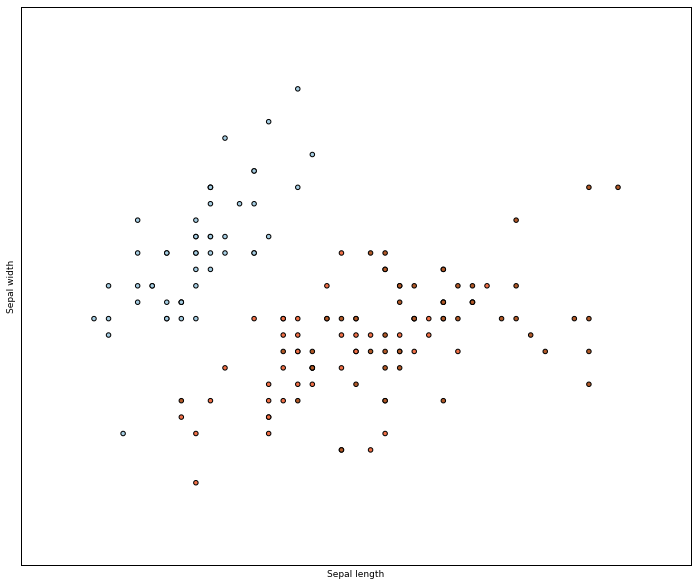

In [31]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features.
Y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(12, 10))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

In [32]:
bias = np.ones((X.shape[0], 1))
X = np.hstack((X, bias))
Y[Y==1] = -1
Y[Y==2] = -1
Y[Y==0] = +1

np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

X_iris_training = X[training_index]
Y_iris_training = Y[training_index]
X_iris_testing = X[training_index]
Y_iris_testing = Y[training_index]

In [ ]:
# def average_accuracy(n, X_testing, Y_testing, 
#                      X_training, Y_training, iterations, center='ac', sample=1, M=None):
#     testing = 3
#     size = X_testing.shape[0]
#     lower = np.inf
#     upper = -1 * np.inf
#     total = 0
#     total_correct = 0
#     accuracies = []
#     for i in range(n):
#         active_outcome = \
#             active.active(X_training, Y_training, iterations, 
#                           center=center, sample=sample, testing=testing, M=M)
#         w = active_outcome[0]
#         predictions = active.linear_predictor(X_testing, w)
#         results = predictions == Y_testing
#         correct = np.count_nonzero(results)
#         # total_correct = total_correct + correct
#         # total = total + X_testing.shape[0]
#         accuracy = correct/size
#         accuracies.append(accuracy)
        
#         n_cp = active_outcome[1]
#         if n_cp > upper:
#             upper = n_cp
#         if n_cp < lower:
#             lower = n_cp
        
#     # accuracy = total_correct/total
#     average_acc = np.sum(accuracies)/n
#     return (average_acc, lower, upper)

In [ ]:
# def experiment(n, test_iter, X_testing, Y_testing, X_training, Y_training,
#                iterations, center='ac', sample = 1, M=None, plot=1):
#     testing=3
#     test_iterations = []
#     test_averages = []
#     test_lowers = []
#     test_uppers = []
    
#     for i in range(test_iter):
#         i = i + 1
#         test_iterations.append(i)
#         average_outcome = \
#             average_accuracy(n, X_testing, Y_testing, X_training, Y_training, 
#                              i, center=center, sample=sample, M=None)
#         average = average_outcome[0]
#         lower = average_outcome[1]
#         upper = average_outcome[2]
        
#         test_averages.append(average)
#         test_lowers.append(lower)
#         test_uppers.append(upper)    
        
#     table = pd.DataFrame([test_iterations, test_lowers, 
#                           test_uppers, test_averages])
#     table = table.transpose()
#     table.columns = ['points queried', 'smallest #CPs', 'largest #CPs', 'accuracy']
#     display(table)
    
#     if plot == 1:
#         plt.plot(test_iterations, test_averages)
#         plt.xlabel('Number of iterations')
#         plt.ylabel('Average accuracy over %d tests' % n)
#         plt.title('Average accuracy of a cutting plane active learning algorithm')
#         plt.show()

In [ ]:
def compute_accuracy(w, X_testing, Y_testing):
    size = X_testing.shape[0]
    predictions = active.linear_predictor(X_testing, w)
    results = predictions == Y_testing
    correct = np.count_nonzero(results)
    accuracy = correct/size
    return accuracy
    
def weights_matrix(n, iterations, X_training, Y_training, center='ac', 
                   sample=1, M=None):
    testing = 3
    matrix_of_weights = []
    for i in range(n):
        weights = active.active(X_training, Y_training, iterations, center=center,
                                sample = sample, testing=testing, M=M)[2]
        matrix_of_weights.append(weights)
    return matrix_of_weights

def experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
               center='ac', sample = 1, M=None):
    testing=3
    matrix_of_weights = weights_matrix(n, iterations, X_training, Y_training, 
                                       center=center, sample=sample, M=M)
    matrix_of_accuracies = []
    
    for weights in matrix_of_weights:
        accuracies = []
        for weight in weights:
            accuracy = compute_accuracy(weight, X_testing, Y_testing)
            accuracies.append(accuracy)
        matrix_of_accuracies.append(accuracies)
    
    matrix_of_accuracies = np.array(matrix_of_accuracies)
    sum_of_accuracies = matrix_of_accuracies.sum(axis=0)
    average_accuracies = sum_of_accuracies/n
    return average_accuracies

#     queries = np.arange(1, n + 1)
#     plt.plot(table['points queried'], table['accuracy'])
#     plt.xlabel('Number of iterations')
#     plt.ylabel('Average accuracy over %d tests' % n)
#     plt.title('Average accuracy of a cutting plane active learning algorithm')
#     plt.show()

In [ ]:
n = 25
iterations = 50

X_training = X_iris_training
Y_training = Y_iris_training
X_testing = X_iris_testing
Y_testing = Y_iris_testing

queries = np.arange(1, iterations + 1)
average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center='ac', sample = 1, M=None)

plt.plot(queries, average_accuracies)
plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
n = 25
iterations = 50

X_training = X_iris_training
Y_training = Y_iris_training
X_testing = X_iris_testing
Y_testing = Y_iris_testing

queries = np.arange(1, iterations + 1)
average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center='random', sample = 1, M=None)

plt.plot(queries, average_accuracies)
plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
n = 25
iterations = 50

X_training = X_iris_training
Y_training = Y_iris_training
X_testing = X_iris_testing
Y_testing = Y_iris_testing

queries = np.arange(1, iterations + 1)
average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center='cc', sample = 1, M=None)

plt.plot(queries, average_accuracies)
plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
n = 25
iterations = 70

configs = [('ac', 'ro'), ('cc', 'go'), ('random', 'bo')]

X_training = X_iris_training
Y_training = Y_iris_training
X_testing = X_iris_testing
Y_testing = Y_iris_testing

queries = np.arange(1, iterations + 1)

plt.figure(figsize=(20,10))

for config in configs:
    average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center=config[0], sample = 1, M=None)
    plt.plot(queries, average_accuracies, config[1])

plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
a = np.zeros(3)
b = np.array([2])
np.hstack((a, b))

In [ ]:
dimension = 3
A = []
b = []
for i in range(dimension):
    a_upper = [0]*dimension
    a_lower = [0]*dimension
    a_upper[i] = 1
    a_lower[i] = -1
    A.append(a_upper)
    A.append(a_lower)
    b.append(0.0001)
    b.append(0.0001)
A = np.array(A)
b = np.array(b)

In [ ]:
active.chebyshev_center(A, b)

In [ ]:
x = np.array([1, 2, 3])
x = x[:-1]
x

In [ ]:
n = 5
iterations = 30
np.array(experiment(n, iterations, X_iris_testing, Y_iris_testing, X_iris_training, Y_iris_training,
           center='ac', sample = 1, M=None, plot=1)).shape

In [ ]:
n = 25
test_iter = 30
experiment(n, test_iter, X_iris_testing, Y_iris_testing,
           X_iris_training, Y_iris_training,
           iterations, center='ac', sample = 1, M=None, plot=1)

In [ ]:
n = 50
test_iter = 30
experiment(n, test_iter, X_iris_testing, Y_iris_testing,
           X_iris_training, Y_iris_training,
           iterations, center='random', sample = 1, M=None, plot=1)

In [ ]:
names = ['diabetes', 'num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age']
data = pd.read_csv('diabetes_scale.csv', header=None, names=names)
data['diabetes'].replace(-1, 0, inplace=True) # The target variable need be 1 or 0, not 1 or -1
data['ones'] = np.ones((data.shape[0], 1)) # Add a column of ones
data.head()

In [ ]:
Y = data['diabetes']
X = data[['num preg', 'plasma', 'bp', 'skin fold', 'insulin', 'bmi', 'pedigree', 'age', 'ones']]

In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
Y[Y==0] = -1

In [ ]:
X

In [ ]:
Y

In [ ]:
np.random.seed(1)
size = X.shape[0]
index = np.arange(size)
np.random.shuffle(index)
training_index = index[:int(size/2)]
testing_index = index[int(size/2):]

In [ ]:
X_diabetes_training = X[training_index]
Y_diabetes_training = Y[training_index]
X_diabetes_testing = X[training_index]
Y_diabetes_testing = Y[training_index]

In [ ]:
n = 1
iterations = 19

X_training = X_diabetes_training
Y_training = Y_diabetes_training
X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing

queries = np.arange(1, iterations + 1)
average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center='cc', sample = 1, M=None)

plt.plot(queries, average_accuracies)
plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
n = 30
iterations = 70

configs = [('ac', 'ro'), ('cc', 'go'), ('random', 'bo')]

X_training = X_diabetes_training
Y_training = Y_diabetes_training
X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing

queries = np.arange(1, iterations + 1)

plt.figure(figsize=(20,10))

for config in configs:
    average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center=config[0], sample = 1, M=None)
    plt.plot(queries, average_accuracies, config[1])

plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
n = 30
iterations = 50

configs = [('ac', 'ro'), ('cc', 'go'), ('random', 'bo')]

X_training = X_diabetes_training
Y_training = Y_diabetes_training
X_testing = X_diabetes_testing
Y_testing = Y_diabetes_testing

queries = np.arange(1, iterations + 1)

plt.figure(figsize=(20,10))

for config in configs:
    average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center=config[0], sample = 1, M=None)
    plt.plot(queries, average_accuracies, config[1])

plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()

In [ ]:
n = 10
iterations = 50
average_accuracy(n, X_testing, Y_testing, 
                 X_training, Y_training, iterations, center='ac', testing=1, sample=1, M=None)

In [ ]:
n = 25
iterations = 50

X_training = X_iris_training
Y_training = Y_iris_training
X_testing = X_iris_testing
Y_testing = Y_iris_testing

queries = np.arange(1, iterations + 1)
average_accuracies = experiment(n, iterations, X_testing, Y_testing, X_training, Y_training,
                                  center='cc', sample = 1, M=None)

plt.plot(queries, average_accuracies)
plt.xlabel('Number of iterations')
plt.ylabel('Average accuracy over %d tests' % n)
plt.title('Average accuracy of a cutting plane active learning algorithm')
plt.show()